## 01 Iris - Exploratory Data Analysis

#### Last Updated: 12 May 2017

*Version 2: Implemented scikit-learn StandardScaler and PCA*

*Version 1: Initial EDA*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%ls ./data

Iris.csv


We begin by loading the data into a Pandas dataframe and assessing what we have to work with.

In [3]:
iris = pd.read_csv('./data/Iris.csv',index_col='Id')

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


The dataset appears clean!!!

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Next we calculate some summary statistics.

In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


It looks like the variables are all in the same units and have similar scale! However, the standard deviation of `PetalLengthCm` is much higher...

Let's now visualize the data to hopefully gain some further insights.

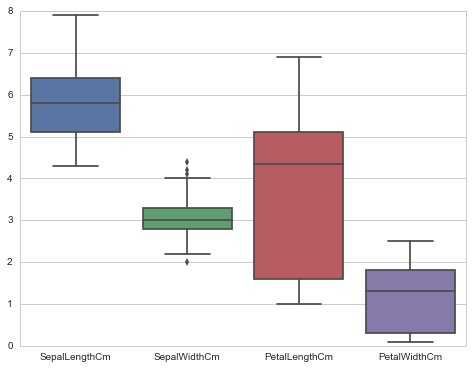

In [7]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.boxplot(data=iris)

The boxplot shows that `PetalLengthCm` does indeed have a drastically larger variance than the other variables. This will be important to remember when performing PCA. Also, the distributions for `PetalLengthCm` and `PetalWidthCm` appear to be skewed.

Next let's create individual boxplots for each species.

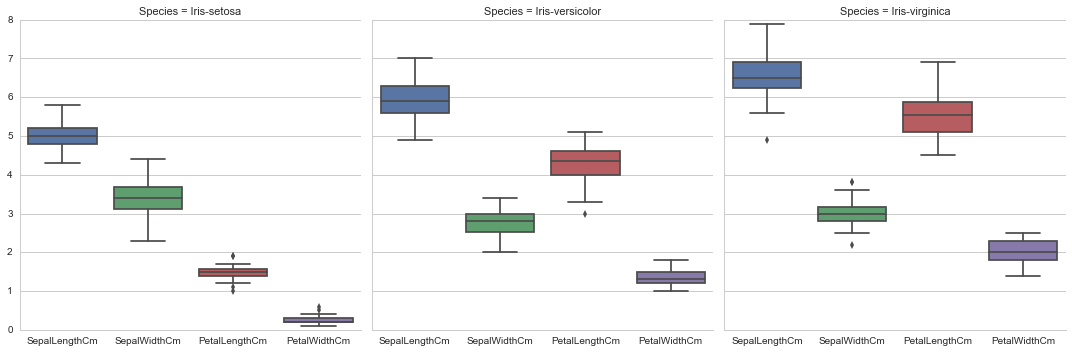

In [8]:
sns.factorplot(data=iris,kind='box',col='Species',size=5)

Note how the boxplots for *iris-versicolor* and *iris-virginica* look very similar, but the boxplots for *iris-setosa* are significantly different! In particular, it appears that we might be able to correctly classify *iris-setosa* plants by petal length/width alone!

To investigate further we compare the boxplots for each individual variable separately.

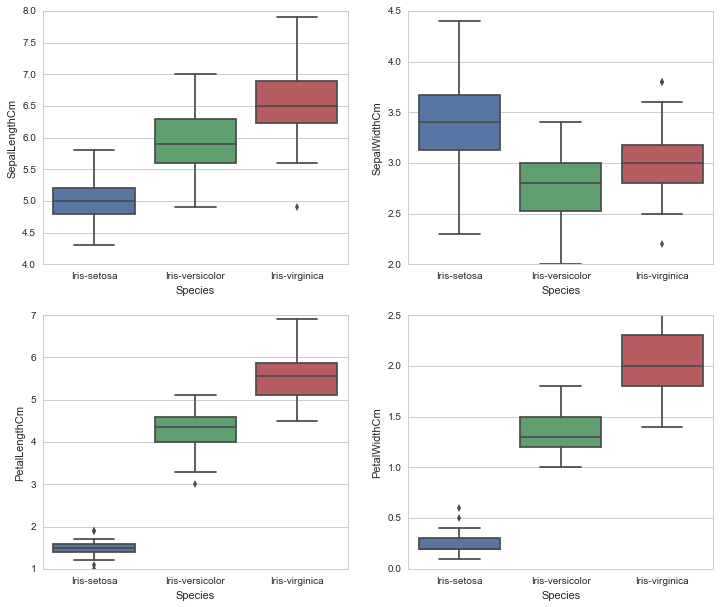

In [9]:
fig, ax = plt.subplots(2,2,figsize=(12,10))
col_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

for i in range(2):
    for j in range(2):
        sns.boxplot(data=iris,x='Species',y=iris[col_names[2*i+j]],ax=ax[i][j])

From these boxplots it appears that *iris-setosa* should be **linearly separable** from the other species!

Next we look at a pair plot to visualize the relationships between each pair of variables.

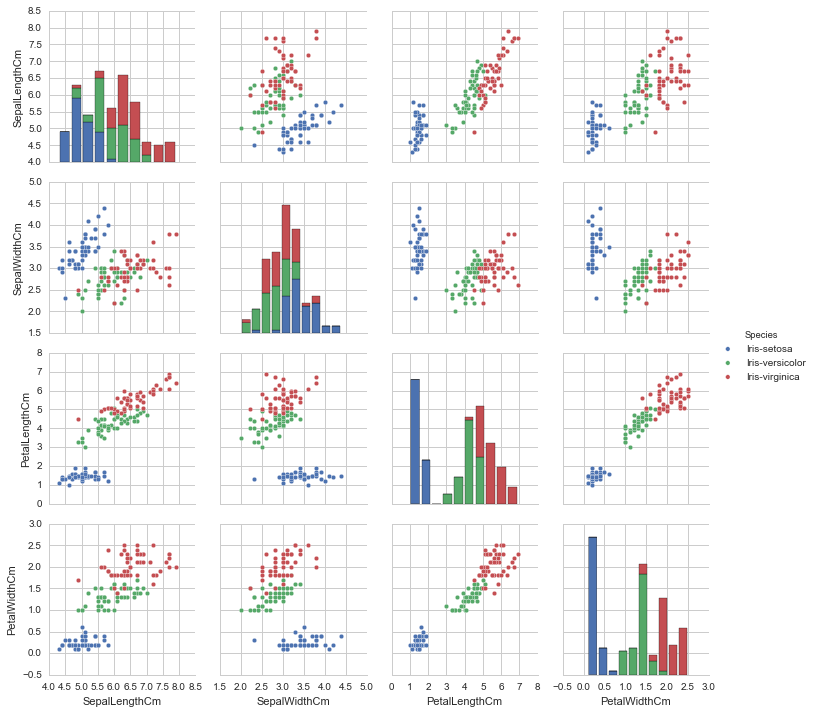

In [10]:
sns.pairplot(data=iris,hue='Species')

Once again it appears that it should be relatively easy to classify *iris-setosa*. Also note that `PetalLengthCm` and `PetalWidthCm` appear to be strongly correlated, while `SepalLengthCm` and `SepalWidthCm` do not. To be more precise we look at the corresponding correlation matrix for the predictor variables.

In [11]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


We can visualize the correlation matrix with a heat map.

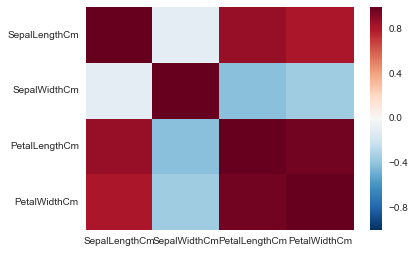

In [12]:
sns.heatmap(data=iris.corr())

It is interesting to note that while `PetalLengthCm` and `PetalWidthCm` are highly correlated with each other, they are also highly correlated with `SepalLengthCm`! Since most of the variability in the data set can be attributed to `PetalLengthCm`, an ad hoc dimensionality reduction technique might be to drop `PetalWidthCm` and `SepalLengthCm` from the analysis and just use `PetalLengthCm` and `SepalWidthCm`!

In [13]:
totalVar = np.trace(iris.cov()) # Sum the variances on the diagonal of the matrix.

print("The total variability in the predictor variables is {}.".format(totalVar))

The total variability in the predictor variables is 4.569291275167785.


In [14]:
petalLengthCmVar = iris['PetalLengthCm'].var()

print("Petal length alone accounts for {}% of the total variation.".format(
    petalLengthCmVar/totalVar*100))

Petal length alone accounts for 68.1326540783986% of the total variation.


In [15]:
sepalWidthCmVar = iris['SepalWidthCm'].var()

print("Petal length plus sepal width account for {}% of the total variation.".format(
    (petalLengthCmVar+sepalWidthCmVar)/totalVar*100))

Petal length plus sepal width account for 72.24716583796538% of the total variation.


### Principal Component Analysis (PCA)

To see if we can reduce the dimensionality of the data while keeping a higher percentage of the variation originally in the data we will now perform **principal compontent analysis (PCA)**.

In [16]:
from numpy.linalg import eig, svd

lambdas, vects = eig(iris.cov().values) # NOTE: We could also calculate 
                                        # the SVD of the centered data matrix.

In [17]:
lambdas

array([ 4.22484077,  0.24224357,  0.07852391,  0.02368303])

In [18]:
vects

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [19]:
sum(lambdas)

4.5692912751677808

Note that the sum of the eigenvalues of the covariance matrix is equal to the total variation in the variables!

If we wish to reduce the dimension of the data set down to two dimensions we will only need the first two eigenvectors.

In [20]:
principalDir = vects[:,0:2]

principalDir

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

In [21]:
print("Note that these two principal directions account for" +
      " {}% of the total variation in the data!".format(np.sum(lambdas[0:2])/np.sum(lambdas)*100))

Note that these two principal directions account for 97.76317750248035% of the total variation in the data!


This is a much larger percentage than if we had just dropped `PetalWidthCm` and `SepalLengthCm` from the original data set!

Next we project the original data onto the first two principal directions and create a new dataframe.

In [22]:
irisProj = iris.drop('Species',axis=1).values @ principalDir

irisPCA = pd.DataFrame(irisProj,columns=['PC1','PC2'],index=iris.index)
irisPCA['Species'] = iris['Species']

irisPCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 3 columns):
PC1        150 non-null float64
PC2        150 non-null float64
Species    150 non-null object
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


Finally we make a scatterplot of the reduced data set.

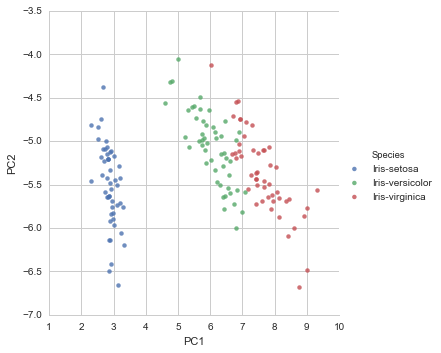

In [23]:
sns.lmplot(data=irisPCA,x='PC1',y='PC2',fit_reg=False,hue='Species')

#### Appendix: Standardization of Features

We previously mentioned that `PetalLengthCm` had a much higher variability than the other features. This means that `PetalLengthCm` greatly influences the first principal direction found in PCA. What would change if we standardized each of the features to have zero mean and unit variance *before* applying PCA?

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
irisZ = scaler.fit_transform(iris[col_names].values)
irisZ = pd.DataFrame(irisZ,columns=col_names,index=iris.index)

irisZ['Species'] = iris['Species']

In [25]:
# Original implementation WITHOUT using scikit-learn

#means = iris.mean().values # Calculate feature means.
#stdevs = iris.std().values # Calculate feature standard deviations.

#irisZ = pd.DataFrame()

#for i in range(4):
    # Use the col_names variable previously defined.
#    irisZ[col_names[i]] = iris[col_names[i]].map(lambda x: (x-means[i])/stdevs[i])
    
#irisZ['Species'] = iris['Species']

In [26]:
irisZ.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [27]:
irisZ.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


Note that each feature now has zero mean and unit standard deviation!

In [28]:
lambdas, vects = eig(irisZ.cov().values) # NOTE: We could also calculate 
                                         # the SVD of the centered data matrix.
    
principalDir = vects[:,0:2]
print("Note that these two principal directions account for" +
      " {}% of the total variation in the data!".format(np.sum(lambdas[0:2])/np.sum(lambdas)*100))

Note that these two principal directions account for 95.80097536148199% of the total variation in the data!


This is slightly **less** variation retained than when we did **not** standardize the features!

In [29]:
irisProj = irisZ.drop('Species',axis=1).values @ principalDir

irisPCA = pd.DataFrame(irisProj,columns=['PC1','PC2'],index=iris.index)
irisPCA['Species'] = irisZ['Species'].values

irisPCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 3 columns):
PC1        150 non-null float64
PC2        150 non-null float64
Species    150 non-null object
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


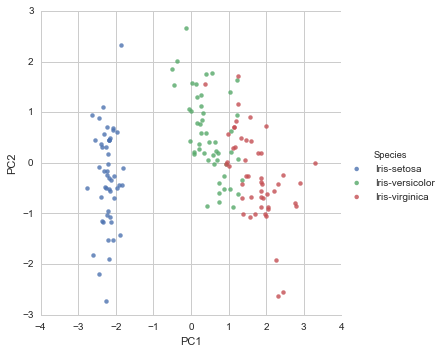

In [30]:
sns.lmplot(data=irisPCA,x='PC1',y='PC2',fit_reg=False,hue='Species')

While this scatterplot looks similar to the previous one, it appears that *iris-versicolor* and *iris-virginica* will now be **more** difficult to correctly classify!

#### Appendix: PCA with Scikit-learn

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
irisProj = pca.fit_transform(iris.drop('Species',axis=1))
irisPCA = pd.DataFrame(irisProj,columns=['PC1','PC2'],index=iris.index)
irisPCA['Species'] = irisZ['Species'].values

irisPCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 3 columns):
PC1        150 non-null float64
PC2        150 non-null float64
Species    150 non-null object
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


In [32]:
pca.explained_variance_

array([ 4.19667516,  0.24062861])

In [33]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

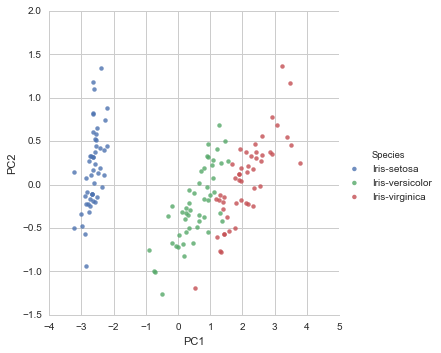

In [34]:
sns.lmplot(data=irisPCA,x='PC1',y='PC2',fit_reg=False,hue='Species')

Note that this scatterplot looks different than the first one we obtained! This is due to the choice of each principal direction's "direction".

#### TODO:
1. ~~Re-implement feature standardization using scikit-learn's StandardScaler().~~
2. ~~Re-implement PCA using scikit-learn.~~